# Linear Regression

### Class Objectives
- Regression
- Simple Linear Regression
- Least Squares method (OLS)
- Gradient Descent
- Multiple Linear Regression
- Measuring the goodness of the fit
    - $R^2$
    - RMSE
    - Loss function / Cost Function
    - Errors vs Residuals
- Assumptions of Linear Regression
    - Linearity
    - Normality of residuals
    - Independence
    - Homoscedasticity - homogenity of variance
- Covariance
- Correlation
- Dummies


In [129]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as smf
from sklearn.datasets import load_boston
from sklearn.metrics import r2_score, mean_squared_error

In [72]:
df = pd.read_csv("data/horas_vs_nota.csv", index_col=0)

In [73]:
df.head()

,horas_de_estudio,nota
0,865,95
1,4,12
2,305,35
3,437,56
4,682,86


In [74]:
df.describe()

,horas_de_estudio,nota
count,100.000000,100.000000
mean,428.540000,47.940000
std,285.241752,27.757907
min,2.000000,0.000000
25%,167.250000,29.500000
50%,424.500000,44.000000
75%,662.500000,68.000000
max,986.000000,100.000000


/Users/felipe/miniconda3/envs/ironhack/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


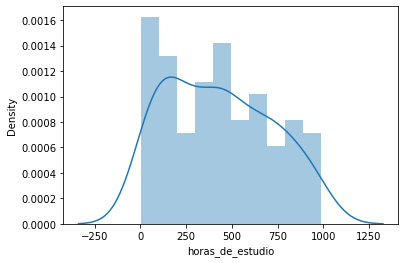

In [75]:
sns.distplot(df["horas_de_estudio"], bins=10);

<AxesSubplot:xlabel='horas_de_estudio', ylabel='nota'>

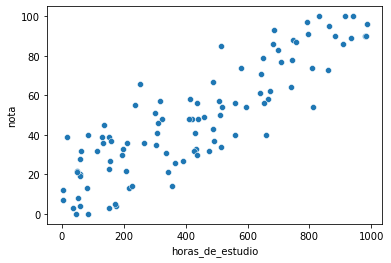

In [76]:
sns.scatterplot(x=df["horas_de_estudio"], y=df["nota"])

We try to model $mark = f(hours)$.

We try a linear regression, using the equation for a line:
### $y = mx + b$

In many statistics books, you may find the same equation as $y = b_0 + b_1x$

In [77]:
mark = lambda hours:  0.1 * hours
mark2 = lambda hours:  0.12 * hours + 10

In [78]:
df["prediction_1"] = df["horas_de_estudio"].apply(mark)
df["prediction_2"] = df["horas_de_estudio"].apply(mark2)

In [79]:
df.head()

,horas_de_estudio,nota,prediction_1,prediction_2
0,865,95,86.5,113.80
1,4,12,0.4,10.48
2,305,35,30.5,46.60
3,437,56,43.7,62.44
4,682,86,68.2,91.84


In [80]:
df["error_1"] = (df["nota"] - df["prediction_1"])**2
df["error_2"] = (df["nota"] - df["prediction_2"])**2

In [81]:
df.head()

,horas_de_estudio,nota,prediction_1,prediction_2,error_1,error_2
0,865,95,86.5,113.80,72.25,353.4400
1,4,12,0.4,10.48,134.56,2.3104
2,305,35,30.5,46.60,20.25,134.5600
3,437,56,43.7,62.44,151.29,41.4736
4,682,86,68.2,91.84,316.84,34.1056


In [82]:
df["error_1"].mean()**.5

15.324542407523952

In [83]:
df["error_2"].mean()**.5

21.757015971865258

In [84]:
x = np.arange(0,1000,5)

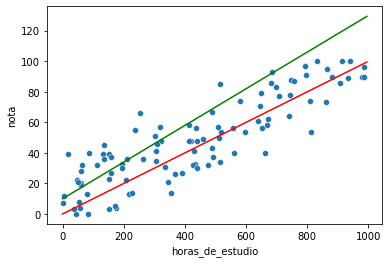

In [85]:
sns.scatterplot(x=df["horas_de_estudio"], y=df["nota"])
plt.plot(x, mark(x), c="r")
plt.plot(x,mark2(x), c="g")

$error = L(m,b)$

In [86]:
# Method 1
# """Brute Force"""
# Not very efficient
# Had to guess values for the m and b range
m_range = np.arange(0,0.5,0.01)
b_range = np.arange(0,20,1)
optimization = pd.DataFrame(columns=["m","b","rmse"])

for m in m_range:
    for b in b_range:
        line = lambda hours : m*hours +  b
        y_pred = df["horas_de_estudio"].apply(line)
        error = ((df["nota"]-y_pred)**2).mean()**.5
        optimization = optimization.append({"m":m,"b":b,"rmse":error}, ignore_index=True)

In [87]:
optimization.sort_values(by="rmse").head()

,m,b,rmse
174,0.08,14.0,13.819467
173,0.08,13.0,13.830809
189,0.09,9.0,13.856408
190,0.09,10.0,13.865686
175,0.08,15.0,13.880348


## Gradient Descent

In [88]:
# Normalize data!!! Variables between 0 and 1
data = df.copy()
norm_hours = data.horas_de_estudio.abs().max()
norm_marks = data.nota.abs().max()
data.horas_de_estudio /= norm_hours
data.nota /= norm_marks
data.head()

,horas_de_estudio,nota,prediction_1,prediction_2,error_1,error_2
0,0.877282,0.95,86.5,113.80,72.25,353.4400
1,0.004057,0.12,0.4,10.48,134.56,2.3104
2,0.309331,0.35,30.5,46.60,20.25,134.5600
3,0.443205,0.56,43.7,62.44,151.29,41.4736
4,0.691684,0.86,68.2,91.84,316.84,34.1056


In [89]:
# Method 2
# We need 2 random values of m and b to start
optimization2 = pd.DataFrame(columns=["m","b","error","rmse"])
m = 0
b = 0
learning_rate = 0.1
for _ in range(20): # Going through the same points multiple times 
    for i, row in data.iterrows():
        line = lambda hours : m*hours + b
        x = row["horas_de_estudio"]
        y = row["nota"]
        y_pred = line(x)
        error = y-y_pred
        rmse = ((data["nota"] - data["horas_de_estudio"].apply(line))**2).mean()**.5
        optimization2 = optimization2.append({"m":m,"b":b,"error":error, "rmse":rmse}, ignore_index=True)
        m = m + error * x * learning_rate
        b = b + error * learning_rate

In [90]:
optimization2.tail()

,m,b,error,rmse
1995,0.829300,0.124898,0.323151,0.137722
1996,0.837559,0.157213,0.011164,0.143821
1997,0.837614,0.158329,0.138861,0.144157
1998,0.848768,0.172215,0.020931,0.150875
1999,0.849426,0.174308,-0.088937,0.151870


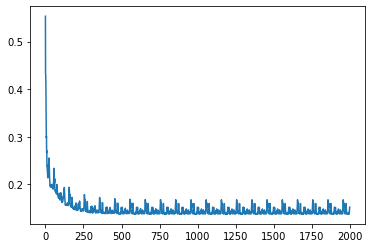

In [91]:
# Loss Function
plt.plot(optimization2.rmse)

In [92]:
x = np.arange(-10,11,1)
y = x**2

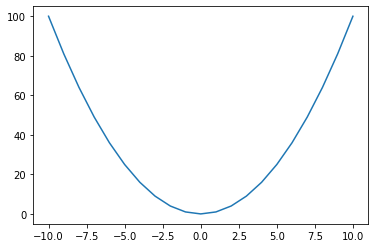

In [93]:
sns.lineplot(x=x,y=y);

In [94]:
m,b = optimization2.iloc[-1][["m","b"]].values
line = lambda x : m*x + b
m1,b1 = optimization2.sort_values(by="rmse").iloc[0][["m","b"]].values
best_line = lambda x : m1*x + b1

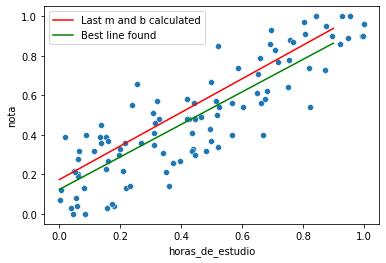

In [95]:
sns.scatterplot(x=data["horas_de_estudio"],y=data["nota"])
x = np.arange(0,1,0.1)
plt.plot(x,line(x), c="r", label="Last m and b calculated")
plt.plot(x,best_line(x), c="g", label="Best line found")
plt.legend()

/Users/felipe/miniconda3/envs/ironhack/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='rmse', ylabel='Density'>

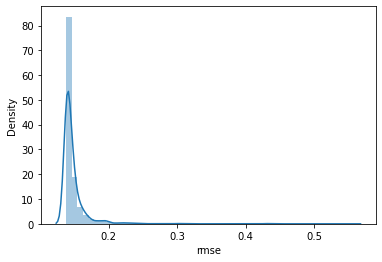

In [97]:
sns.distplot(optimization2.rmse)

### Ordinary Least Squares Method (OLS)

In [26]:
df = df[["horas_de_estudio","nota"]]
df.head()

,horas_de_estudio,nota
0,865,95
1,4,12
2,305,35
3,437,56
4,682,86


In [27]:
x_ = df.horas_de_estudio.mean()
y_ = df.nota.mean()

In [28]:
df["x-x_"] = df.horas_de_estudio - x_
df["y-y_"] = df.nota - y_

In [29]:
df["(x-x_)(y-y_)"] = df["x-x_"] * df["y-y_"] 
df["(x-x_)**2"] = df["x-x_"]**2

In [30]:
df.head()

,horas_de_estudio,nota,x-x_,y-y_,(x-x_)(y-y_),(x-x_)**2
0,865,95,436.46,47.06,20539.8076,190497.3316
1,4,12,-424.54,-35.94,15257.9676,180234.2116
2,305,35,-123.54,-12.94,1598.6076,15262.1316
3,437,56,8.46,8.06,68.1876,71.5716
4,682,86,253.46,38.06,9646.6876,64241.9716


In [31]:
m = df["(x-x_)(y-y_)"].sum()/df["(x-x_)**2"].sum()

In [32]:
m

0.0843778709617037

$b = y - mx$

In [33]:
# Line must pass (x_,y_)

In [34]:
b = y_ - m*x_

In [35]:
b

11.780707178071495

In [36]:
x = np.arange(0,1000,1)
y = m*x + b

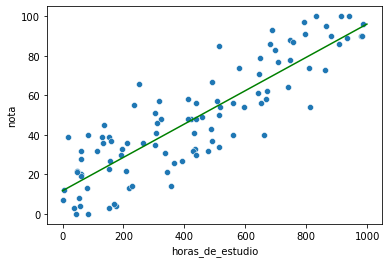

In [37]:
sns.scatterplot(x=df["horas_de_estudio"],y=df["nota"])
plt.plot(x,y,c="g")

### Using Scikit-Learn

In [38]:
from sklearn.linear_model import LinearRegression

In [46]:
lr = LinearRegression(fit_intercept=True)

In [47]:
lr.fit(df["horas_de_estudio"].to_frame(),df["nota"])

LinearRegression()

In [48]:
lr.coef_

array([0.08437787])

In [50]:
lr.intercept_

11.780707178071474

In [57]:
# lr.predict(x.reshape(-1,1))

## $R^2$

- The goodness of our fit

In [63]:
df["y_pred"] = lr.predict(df["horas_de_estudio"].to_frame())
df["y_pred-y_"] = df["y_pred"] - y_

In [64]:
df.head()

,horas_de_estudio,nota,x-x_,y-y_,(x-x_)(y-y_),(x-x_)**2,y_pred,y_pred - y_,y_pred-y_
0,865,95,436.46,47.06,20539.8076,190497.3316,84.767566,36.827566,36.827566
1,4,12,-424.54,-35.94,15257.9676,180234.2116,12.118219,-35.821781,-35.821781
2,305,35,-123.54,-12.94,1598.6076,15262.1316,37.515958,-10.424042,-10.424042
3,437,56,8.46,8.06,68.1876,71.5716,48.653837,0.713837,0.713837
4,682,86,253.46,38.06,9646.6876,64241.9716,69.326415,21.386415,21.386415


In [68]:
r2 = (df["y_pred-y_"]**2).sum()/(df["y-y_"]**2).sum()

In [69]:
r2

0.7518130774464552

![R^2](https://miro.medium.com/max/1400/0*ShyeOD5V5Ln5YTXH)

![](https://miro.medium.com/max/1400/0*34NYjsLrzzAmMklu.png)

## With Statsmodels

In [107]:
mod = smf.OLS(df["nota"],df["horas_de_estudio"])

In [108]:
res = mod.fit()

In [109]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   nota   R-squared (uncentered):                   0.924
Model:                            OLS   Adj. R-squared (uncentered):              0.924
Method:                 Least Squares   F-statistic:                              1209.
Date:                Mon, 23 Nov 2020   Prob (F-statistic):                    2.67e-57
Time:                        13:31:31   Log-Likelihood:                         -414.15
No. Observations:                 100   AIC:                                      830.3
Df Residuals:                      99   BIC:                                      832.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
horas_de_estudio     0.1035      0.003     34.775      0.000       0.098       0.109
==============================================================================
Omnibus:                        1.728   Durbin-Watson:                   1.776
Prob(Omnibus):                  0.421   Jarque-Bera (JB):                1.485
Skew:                           0.150   Prob(JB):                        0.476
Kurtosis:                       2.484   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Multiple Linear Regression

In [112]:
X,y = load_boston(return_X_y=True)

In [117]:
X = pd.DataFrame(X)
y = pd.DataFrame(y)

In [120]:
X.columns = load_boston()["feature_names"]

In [122]:
print(load_boston()["DESCR"])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [123]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [124]:
lm = LinearRegression(fit_intercept=True)

In [125]:
lm.fit(X,y)

LinearRegression()

In [126]:
lm.coef_

array([[-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,
         2.68673382e+00, -1.77666112e+01,  3.80986521e+00,
         6.92224640e-04, -1.47556685e+00,  3.06049479e-01,
        -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
        -5.24758378e-01]])

In [127]:
lm.intercept_

array([36.45948839])

In [128]:
y_pred = lm.predict(X)

In [130]:
r2 = r2_score(y_pred=y_pred, y_true=y)

In [131]:
r2

0.7406426641094095

In [133]:
rmse = mean_squared_error(y_pred=y_pred, y_true=y)**.5

In [134]:
rmse

4.679191295697281

<AxesSubplot:>

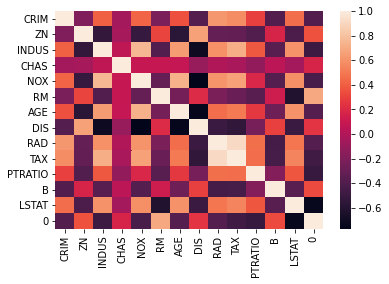

In [140]:
sns.heatmap(pd.concat([X,y],axis=1).corr())

$corr(x,y) = \frac{cov(x,y)}{\sqrt{va(x)va(y}}$

## Dummies

In [141]:
titanic = pd.read_csv("data/titanic.csv")

In [143]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [149]:
pd.get_dummies(titanic["sex"], )#drop_first=True)

,female,male
0,1,0
1,0,1
2,1,0
3,0,1
4,1,0
...,...,...
1305,1,0
1306,0,1
1307,0,1
1308,0,1


In [153]:
pd.get_dummies(titanic["embarked"],drop_first=True)

,Q,S
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
1305,0,0
1306,0,0
1307,0,0
1308,0,1


### Further Resources
- [Cool visualisation of Linear Regressions](https://www.desmos.com/calculator/jwquvmikhr)
- [All models...](https://en.wikipedia.org/wiki/All_models_are_wrong)
- [Dangers of p-value](https://www.youtube.com/watch?v=0Rnq1NpHdmw)

![](data:image/png;base64,%20iVBORw0KGgoAAAANSUhEUgAAARkAAACzCAYAAAC94GgrAAAgAElEQVR4Ae3drc8s23Hv8c0tHWwp0CySsUlQyA0wMQvIlQJyQUBAmFlYJFMDI1Pj0EhBJv4LosBIgZECIkWKFCnSvvo8x1+ftfv0zPS87pnpVVLv7l4vVbVqVf1WrTXz7Pn0edK0wLTAtMAdLfDpjrwn62mBaYFpgc8TZK50gv/5n//57Jo0LTAtsG6BCTLrdvmi9L/+678+//d///cXZV7+5V/+5fNf/uVffv7FL37xvbpLC/73f//30q6z37TAU1pggsyJaRH0v/71rz///d///RdA82//9m+f//RP//Tzp0+fPv/kJz/5/J//+Z+rnJbghN+//uu/fv6P//iP77VX9qtf/eoLXv/4j//4+R/+4R++yJbw+Pd///fPdNBnLZPSZq38e0JfqMB42O63v/3t59/97nerNnyh4exG1QkyJ6ZasP7yl7/8ABN3JMD//M///OOSxfzJn/zJR9mSlWD4s//zZ1/UCZS//du//eC5bC8zqr12yf3Rj370+Z//+Z8/mtMH4P3RH/3RB7gBuJ/+9KcfQAjoyPy7v/u7zz/72c8+ypeglUxjEKinCEjiiQ99fvOb33wGfPQBcvRZI/qTYUzk/NM//dMHWAJM7y62+5u/+ZuPyzMAiWSPZLnwcskagTpwd/3xH//xH+rrRycy6JduyuiMxxqNfYC28VpY6GTc6Tz2x9v4khFfcowZad/Ysxf+y4Wnvu96nyCzYWY5HOcW2DngN9988+FMHDBgUJcDCRLlf/3Xf/2Fc6sXWIJnSfrXnrP++Mc//nB2ASXActBApSCmA7DR5oc//OEHwBSgyn/+859/OHvyOD+g+qv/91cVHbyTAVDH4MYT8P3F//2Lj0Az1pGAnQClv7b0Zy99vLvUkQ+4XHQHjAUomwNv7YwPT/2NHRjRKxtlS/Zjc7pqqx8S6MrZb0nq6Ecn8vBnQwBGNp3UmxdAoT2ij/H3Hl+2Sh/64UN248bLeJfgVP93vE+Q2TCrnIaTCFZOwwkFEbLScUSBxhFzMOUcalydteecAkpAIAGfwwksWYgA4ux4qbPSAgXgJFDIKYDwIEN79T/4wQ/+EKjqOLqgEzDpgq9x0IHedDpGxiJQ9CffXcC56EpuvPFjJ/qQXSbjXTYTOAho44rowI5kkaGefvroq0xwZuv6acPObGeM7EeuO6BJT/M3ytOf7c0FfelvHGTpw0bsTF8X+fiq189iwYZAZQRZWaoxaAOE+In+2Qxf+o59Gsu73ifIbJhZAc25OAvnDQh05fgcDXF4wag9h/e+JDy059gujuyOZ8EiYDgrR42AjXYc2J3zChoraRkBRy6YCgT6CR78yBBAgo+zI+WuQ0SufmQGhmNbZfrTwdjoZRxlJNrSSzAX5HRmA+We2QmIKtOGbuQhwVzgawtktDE+sslUD0jZbdTRO72MmV3IGwk/uuKBRrnADUiMc9C8aKscEJJrTiLjZ3M68gWyR9KP3FHPsf4dnyfIbJhVzicArD5ddWt17V3AcTzOPTpo9RydcwIhbQWXS1Ap48hkccQlCVwB5bL9EDiyqgKFQ+OhP94CW6CQyem100d52YvVeQ0Mk20M2tNRHyv6clz4402uaxlY6keQIRPwkUtfOnk3PjLwYA98XN71YROZGlnAGfjhy95ssswO8NdXv2XmZHxkjAChHRBDFgoyGiuw0978RNoqw7sxq6dXvAKw+uzxPkHmxKxbcQAJ0OBoS+KkHLyViWMDgJxu2Z7zab90Ps5MRqC1JgtQyEIElSAgi1NbMYFADl4Qa6s83fTRlw5biR6ASj9gIKDW+gNibcYgTAbwGEGmjKEsRFBG6UhWF3uyi/HSpXEbm8yBPdWPxJ6Alj6yEmATsLIHOQA6sAIWgM4WCCimY7ZL13HsxsTWZOPDVvoZDx3JBMp4aJcM7dfmd9T/nZ4nyJyYTQ7CkQ+BDGe1subAAmpt1UwMZ1um4eoAiJVxCVr1EzScVxvBp30E0ASaAKEP0l65thwecXiOT8fI6n/M4dWTKaDpLmAbazy8sw8dOrupzj2QCVgFWaCApwN1d0R/8oyvi/3LfNyNDZmb7BK/j4rPnz/0NC9kCvz66YMvfYEMWQENHuxFF+BkzBHgkXW5R3jQlwzjZpslyLANmdoBGXMvG8sW8Xrn+wSZE7PLQTiby/OSBBDnK3Nxz7mXbb1zXs625MV5BSlH5ejx00dQABiBol5gjIGunpNz3gAl2fTWlzyAYfVtNVZGF0F8iAAT3vVZthPkyaCT7CGQqK2xCC6BRSZ9AkNtBDeA1M7zEjAEPZ7GJrDHsesvsEebaGcO2Kp6c8R+2rFvWReAdTUf2rCHMY1bKfNMR7aOjJXsZBijfi7t6TDOI73Z/5i94/1O9wkyJ2ZTEHGm0eHGLhwUcOR8HNvKuDwfqI+gXgaROg4oOPTjpAKbTM8Cg2OSJdgFCZmCj5NzbsEhkFpZgZZ6jp7uZTI5vsDCZwlM6epuXDIzcrRzd5EjkPASOK3M7mUG8aELHfFiT7qOIGPMbIyP8S4BjQx2oz9eAUL8kylLwxtYG3tELvuxO7mu8Ryldu4AkC5LICTX9tM90qa5zLaBFx3JNI/kGZMxmMtsFZ93v0+QOTHDnKUAO9RU4EQcSPAtA6F6IFSQV7a8AxzAwNk5sfbJEJD0EVAc2J0TayP970DYqiuQ8BEAiG4jICiL71KH3vXVB28ghqdLwNFNfQBbH3LGYKSzoDcudgFsa0AiS2G7pU7eG0Mylncy2YFtRtm1w6M5wYsO9FmS/sCBHqPMtT5At2wJH2NkG32RPuwP6NnLfJ2a+6U+7/A+QeZFZ1HQCN4xIAM4jizQ1C9pLbCWbZbvMii89cXT5XmUvexz7L1gX7a5lN+SzzXvdDDeS2nN5vgBnGv4XqrPM/SbIPMMszB1mBZ4YwtMkHnjyZ1DmxZ4Bgt8kvbaU89r2mD6wPSBW/sAfPnkk4AO8+b920PNaYdph+kDt/EBh/mf+iIUBHNYOK9pg+kD0weu9QF44pM3n6p98lFnH7k9w/5t6jAtMC3wHhaAK7728AEye/zs/j2mcY5iWuB5LTBB5nnnZmo2LfAWFpgg8xbTOAcxLfC8Fpgg87xzMzWbFngLC0yQeYtpnIOYFnheC0yQed65mZpNC7yFBSbIvMU0zkFMCzyvBSbIPO/cTM2mBd7CAhNk3mIa5yCmBZ7XAhNknndupmbTAm9hgQkybzGNcxDTAs9rgQkyzzs3U7NpgbewwASZt5jGOYhpgee1wASZ552bqdm0wFtYYILMW0zjaw7Cf9b9DP9p+Gta73W0niDzOnP1VpoCFz9H0u8oNTj/k/8W4PFLB+NPldT/0Xf/raRfcFj7dYJLdTF+/+2Kn1rxn0atkfH7D6FegSbIvMIsvaGOfm/J7xD5vShAA1yU+dEzP8rmv4Mdf5NJsPl9p4LZbxtpIxj9RpK7wNMu8BGk2o0/vQIU8CF3rFPmB+HUI/+bW/L197wMar/vZAz0xU8wuZLrro++ZHmn55LPcnqNx28z+b0tfL0DspHIVh8BpuVPrRgLeYG2enxcbMSW9atN/G55nyBzS2tOXpstIKhdHB6wCERg4/LcD9XFUDsBrU5AAAQ/vuYH5/ySpqAUxH7NUUAjPNQHTMrIBAoCVwALeMCkrF/gFJx+wbKfCSZPQOsT4Yk3efoLJAHd/wmsLjnAkH7pivcIfPHsrj3dAzc82Qh/RFY2qw9QpN/I11j9t7p+WE5fY9DPZezKAyt275cwT4FgMrfeJ8hstdRsdzMLCFqAITAENLDg4JxfmUBZrsqECyKBqo0gASYCWZADGHX+w+pABiBpV2ajHeBQjgAXWYJeQAZetnHK/AqngKcj/ZRH+gIOQRpQuQMqAY0vfsYhuOmkDDitjS2+7mQaj/b6BXD9xK93+qqP6KFfvEfwBsiBNxuyPf7sAWjYjRw81Ot7S5ogc0trTl6bLMDp/FY0ABAYglXwc/bKlLdyx5TzAxFtBYOgB1AIT33VAyGkP+AqaAQRGQWiNuoEnb54aU92K7sA1Q/okBnhoYzu+uIh8D27000QI7zwURbgxWftDkTIBGwyEXoBLHzpF7COfbUno7F5Nw7EDvQkm054lK3QiRz2A74A9dY0QebWFp38TlpAAAhGTi0AgIIgtZoKZPUCCyCMqzXG6gSJgBEc3hEe3l341FbgtV0SUAJ4JDqQrY7sAlnW4NmKTx59R5DBQ0DqL2D1B34u/ABQgQxkAsZAYNRh+UxncvE2PnbAHz9bp8Y89lNmbMAI0d0vBJCtHFixdSATAOLrRwSAs4vcW9MEmVtbdPI7aQEA4hpJIEjdgYUAABRW7IKmtoJAECoHKPqUxQgiQCDAgRBgKKvRXz2e7jIYQSwYR12AgGCz8uMD5LzLvAIvvMgnN9AQrHiP2yUyAIOxqdfW2AIn+q+R8Y2Alt54GVMAMfalW1kanZNpjGymDk99Rx7Gz4bREtQrv+a+S5Ax2a1u1xhv9r3MAoJX0I1kJRZ0ytuCjABRWwEjMJDgEzAjmHBomYQyckaQEkCBgezEKi84BWKkPV20C2TUj4GpLR/SH0AJfvwEMdlAyVYF6AhgbWQyAl09/nSXlQRSyXfHt99BMx7vbAO0yCFvSWxFnjZAjA5kRHQjHz/tAqpxLu4BMOTvEmQY1iTcy6hN7LyvW0CWsdz7mwsB5y441gIJNyAwBqbFYrlgAAVBNbZLE/wFGBnH5l/dqOMIVvHCR9YBOACf9kCL7ICEDsbiHRAIOPp6lvWs6YCv9gEVf2UzOtB7TRdjpgcQAiaAGuBE6eAuy3Enm95AB4gZC0C79ZZpdyBjAn1qIP01+EnTAtdYALAcCvxjfAEAXzxGwEi7NSBa9gM82vJpgHOIN14AK576AEagFkACwOqXci553x3ISF8BjKt0+BLDzT5fWkCwcdRlVvFlq/n2Cha4JcAY765ARoooNZRW2nPbZ0P9SddZALAAbCAzaVpgaYFdgYwU0n7Z/lNq6B3wTLrOArJDoH3rFXBNK2ccsqZkjam/9hza9uUU6belXXLW+B2rW2u/LHP2YbuylYx77TyGHhbLY7z0Ve86xGerHue22xXIZByHW0Bm0nUW4NxAWxazZZvEuWU7BYO7QFcG+F0OJfGrDTBQ7hDUJft0uKkPwOmTF/K1VdehJ3n4F4CetUHK/Ag8cHQGIeDxNB5BgfD0ydDa+Qbe6mrLFnjhOy5kQIHM7OOuj8WtTJpegYfneH4o8ft/1DukVY/IqR29fRolSzcOvt3iSbZFILu4u9jtUURPtv7kCzkN4FHCv5acCTK3sbzgBAoCbgsBDlvVHFxA8DsBokyQClBBg6/gFiA+hRHQ2hXIBRFAcr7m08I+KfHRMN18WuLZx8d4cHRyBCzeP/jBDz7aqPfFtT4pIhMBBECA15LwoBM9kUAiCw/Bro5MvOhlTIgN8DRO5cCC7oGffsa4JPKAbTGqv7b4AVV8yMAbGLeIundEoI9xs7v2j6Jdgsw8P7jevTh7QLCVm6D18SpQ4PAcXYADnoJHMMkKBJQgFTTqAJlgWmYVApIe2uMr0MgQuIKLg+sDRNQDFn2AFNnqvGtPP6BQZhYgFLDLceIhKzAOAQ9g8DE2pJ4ugA2gRJ61N1b6AgVZWeNeAxm6GafxIP3yYzZiH/I804EM/LTxrIxMuuKh7lG0S5AxiWsT+Sijv7ocQS+gOPU5JFAElAABIJ4BhwAQHAJSIFnVA4bmSV99AqPkCmiBJEgFkMDVDqCUgQgoWYxMiGyygFIgU9ajHX6+4gCgXAFX8pZ3MrU3DvYAKMnVVmCrLztSJpMwTmR8dCHbGNhi7P/R6Pd/wkAfoMZudAce+gJQ8oG1Z2X4BDp0NGZXW6Wt2Wfyr7nvEmRaBa4x3F77clxO3Ip6jh0CGU4v0AS94Bc0gEFZfMmxlRKkqADUd6SCdCwrW5KJIH3KmPD3LhjJBmbkCkoABWQEY7oAjREgRjmeyaAnnwIU2o+ZD36AKrDUR1s2RKP+h8aoHeAFEOyBpzHiQZ53YwLA3oGu8eBtLHTUVz0ZjwQYuu8SZDgQx+YUk7ZbgINybPa7hPS3grdSt8q3uqoXTABGXWck5KnzXt/kA4ACtjL8BLZgx0+/wAOoIPwBjwAUoPwhkBGo+QZACIDiP94BZwEcXxkGXsZhvPQT7NoqV5YN6U8/eqVHwDGCFT0BsTuil3dtK6ucfONjA/zZzlj1EfBkjX0+GN7xn12CTJOZI93Rvm/DWoBw3NHxzx0ce7fq6svRBZ+VV6B6lvY7QG37ob2gESgCpuBMttVa+Uh4AQb8rPj6Axv3VnEAIOjoxB8EKwAAYp7JQ1Z/25RDQak/kBBItRf8yScDX2PUjg0953vG01aHvsYL8MpEPpj+3lbAKT3Iw0d/cxOR5aI3OwSqxgRoXLI4ujyKdgkyJoCRm+hHGfuV5XD+ZTBfMh7BKwgiwS7wBYN5cVdWMGkbMJQJ1Nddu9pWDiiU4QNACsKAo3bNP/7aonSpTl88Rp3r313fkTfZgt944gPkBDobeo7wbQzKtSfTVV9ttSMnPWoXn+Vd/WgX/JLDxoHPst893ncJMgY9t0vb3alsIgff3nO2nBbY6ZmMFUYaPa4U0xnWLdD2YVx911vO0mmBdQvsNpOxb54r87pTVGqbMJ4DVP6ou0XANmTcimyRrZ+5dc2F5DuLHbJFttLyHjGxS5CxtwUy9qmT1i1g/+5TEQ5yS+LEeDoTWAMP9c4zZFAONju8lX0CPQe9DnA9L4PGu4NWwGg77O4cBL8t5Dymc5Fl+85t2GWptz75knpj63xpbIuHa0nadCZU3Xgm49mB+wgAxtp7uuFDPl7ku9cuu2mjbNSLzZwVubMb++KD4oVf8tJx632XIMOAtksZcqux9tKO094DYDg3Z/fphu/IcGxOPAIGh/S9E20ABMd3JgR0lAMOuvlERtlIgkC9T2b0E5jkOeTHQ6AIWDLo4lmZgNPewuOTJH3GIMSXrr7s5hKIdEYAzKc4yvCim+/f9ClZn8i5A0y66WPckX76R/TSvjb8lG76JVcfOgE0Y6a3Ojbr0zl6sZGLPtqwiT7aBXjGzt7Gph6/xkNnn0ipS5/03HrfLciYtIy81Vh7aGdVlkHkzLccM56cmVN7BvScnfNzRCS4ODmn1qbVk16CpoUBEOi7JOVW4iiZAKrAN/f4mX86BDD6CkBAIIBHUifwBJr29CNHAGpLb+NQD6CAgDZsqQ3woYtxAjxljRkI6BvRi67Ve6czHmyDlLEHewKCsqkAVj2d2MgYySBfvWffQlYHbJX7Tg1wjMhSpq85GEG3NlvvxoH3rv5AkiOZmBx4q7H20E4AWM3uQXgLkhyWswsUc0GmFbyA6A8bBUKAIBAFuH76CI4l4SNzKTAKTHPuEvgFpb7AAxC4gIX+dFiCDLl4ReoFoaBFgpp+wAXhR3c64ifQygQK6gCDTDpFeAGZsi8ZDN7k4xkFBOrwZFc8gZ92gMz4jBngaC/Y8dXHRTbdjEW7iExl9DD2AK/6c+67BBmOwDmg+KRvLcAWnIlT3ssunN8Vf87HiQtw4CFIZCscni4Fj8ATNFZuf+Q48hnnUHtZiyATVPgIJCQIgZoLcCEy8CpgyQAg5I0kMOkZBTL6I6BWsAMTwczPXD/84Q8/3vmcsdGRXvQIND1HwBYvbYCPZ3qV5dUuQMEDkBmHu3cgEdAAbONTTwcgjK82tZfZeI7w0N+cuDe26s+57xJkTLIJytnPMdi7tuVUguie2V2OmwzBz+HHjMbcCDLg08rP5kChwDB3ntdWV0EtIIECXrYZgYy6gtYzPQokQWg7JLD1W1K68xnBiQ8dAxllApie7Bggka0teQFX/pc+5AriSDugo54tjBMPYyIDASttZGfI3bidddGF7bSXjYxZmToACKzJYXv9tKOzMmMlj+7e2YmOyi+hXYJMK+YlBnvHPpxZsHXeca8xkiOIOatLkHDkVv5AjmOXjVi9lQMBQU1H9YBGf88jCWABIjiR1RuQkR2gKdMGX8GDp/HTBWgIQoEZGOJDX4FptQcI+AliOrhXhpegFcx0w0cbeinTj/+RG2ABBtlGpJ+xBiB44qGfcrw6b/FMN2MDQGTT310fd+OKAkFjwRcZc9slfYwRX5dnYzA+YOF5Ddzjv3bfJciYbE466dtvY7LFmDXcyy6CisNzXDIFB1LOEd0RgAAE2gCXLsEceNj6CNgRCPTFR9/OfQRsQCNokD4BSoHGJwpqfMmuvT7a0TfwUEYXAQqs6utecANUmZR3FyAgl474ROSMQEB3fNvSedee3oAGL8FubNoFkNp7pz/dArG1uaVn9qaHPvrSLSLPmNlfOT2Am7bnkL6A76KDXwNhHIMdifLjAKqjdE7imfDlYPVTF3nWhpHXjFW78c4h8HZ3jfy0wwvqr+k48nn3Z/bkQGMwPWLMBcApWZfMjz75WPyXPlX5sbuAWvI51r46stiVz7oLfD7ovvTD+qzdj41dvB2qP0fGmtxTZfgfkn2o79kgwyEZELlLxyCbwA1soB/wYdyAQVurAwQ2edBXigjtW6HcpZEAQFs8ICcZ2kkV8R4Hia9AwS/eEBlytoLgxWki+lpNRz7V7eXeHFgZJ00L3NMCZ4OMvWx7Y8EKKADPuIcU7AGK9tqpBxTjHi/EV8fZAUOpHzDRr9QQSJDT3pBRoCr+eAKW9tlABzgBIDzwGhFeWXviexr3WXmX9rLLpGmBe1vgLJCx8gtkh0T2uYFHICNzQZxXNiIz0RYQCerK9VUfCKjHC8CMjg8YtMMfCQ6A0jvlHWDpi9wBGX5kHyJZF1l7JTYGypOmBR5hgbNARtA7yAISMgzbGUHtLsMIZAQ4cODM2gloAKA8IPG5vL6yF5d6GYgyWRAgQA7L8JGZABj1yYl/e2fbNfp1Ul7WNG6V8MQb3z1ul2SM5m9pk0c4215k8Cu+KFO3ILo889N8V5sxu/asz/LsZmyT/cwdPq41HyaHTDGFZ7Jqq94CzxcsNmJS7KUbOfQVI8cW6/Q5dT8LZCgMNAzAlsg2RyYhaGU4mCGA4ApUGpw+TuKBAwDIUMoNSLYDYPRjBFQGpAx44Bspw6eAwY9+vvyknByGTn79lO1xu2TeOBNHfmcyTr76tUgc8EMLIj+04IoPAe3dvY/l+b7LvFgg9eHjfFe5Z+Mp6/esr3biz4IxgoNYUG/Rb4GXBOCvbbGmb39qUaxmM3fxQWftAM41dBbIEGZw7hzVgazP+BnAwAxAncEJ5FAyBb0bLEN1lmNADAqs8FPvHYDgRx4jIeV4Z1Ry8QmQtGMUbcg6RHQDZkvwOdT+HcpNtBXrlMOwCfuuraCvYAf+JKhPjfOeYxEbApi/srtFGLjwbQulBbVYAAaCWTavjO/6RjO/N19iwqUd31bWcQDe/Bg4tdCKGzzEhHkUa+TqC0z0J4d9xCzgWcaBOMKDLQOma+x1FshQnJKEI0Y0QOmXwDUQxoGCBi0dM+jIgLXXlrEZj8EYEC/G98xw5DDCeCbD8ct04qmdfgyIFwN5JvsQ7Q1kOBQbGfcpMrcCYkvbU7y+Rj0f4yMF3dfQgcwWO4unzJpf0s08CP4xm2RrNo/ET/bP381hi6u2HSdYiMvKzZ34qY4NAIg2gEb8jnKLuRFkxJi2wEV7MSimk52O59zPAhnKUDKlgIvBe3eF2g2EwtpEBs1oBgdNGTLE1SZDaqdv8jxH+pAT6R9CAxZtGXuUW9vuJhs4NY7K3/HOOdg8xzs1RvZjG3P0ikTvtdX50WMBBGXjFj++ye+AjnfBGxAqBxSIT44LgvKykAIdb3PK7z0HSOJHW3egpi9e2thxqBvnldwxCyKfDAu7frIZz+l/qQ3PAplLhYz9BH+Z0Fj+yGcTYJLfnTgxRxwd69SYObk+Vr9XI34lOMZF6GuNAVAH7IK5DMPWyHsLIXtrN4KMZ8ChTpBbkPlsoIS3nYAMCa8IQAAG4wc05p1c4MLfLcjKXRYTMugTeOFDFzK1KVkAlmSOi30yt9wfDjJblLp3G0az2r07cTJgcY5zcGy2eUX7mNdnWTzoUWCzpcAVwLICoGFeylhkOYEMIJF5AARz4Vl7c+kSsPi2pQEqAU1zh68ybboADaAAOq52EMkqFsjCH69IW+WBXOVb728BMoJoNMqpwTOY653JKsWpWo3OGStn1veVyHgFqhX4GUjm4SxDcMsW6Ffm4B0QAEWZ/ZjJeC/w+XTbFX2AAwDAR+Cqx4Mc70h/mSjwATCylOaTzwMfZfqKG/1G8PAOVJZ0zkK17Iung+1Nf7uUQVJKysdAyl0o5T2bcIMihLMbbAPVbo0MZhwQGS4y8XONffG0r+RgeG8JqnO3EGt6PnMZewOJNWfZorc55dD3InPJ0c2l+zjfl8g0TsEo+J6F+Ci/pVvxYpw9j3ry2XTXRswUT+zjQniu9e+8Z+RZ/7Hsaz2fBTIGCyFzXneoC7UFOCNo45kDmXgoC4WhKscV4N4hMKIAoMh4DDyeB2jnHU+8pJttAciCkNLR2jUhxwxKFzq/I3FsgAsoLiVzwtbNyaV8lv0EELtbxc2juSuNFyiXEF2vHe8lcp+tz7jwPptuV4GMzkBGCtc+LiACChwI2HDWnIsxlHEy/a24vlPA8aAvwHGoFQgBFLzVB16ena4DpGRw4K2Gru+zTca1+rC9sV0asMm3sloIzNMtyPybKzwBi4XGu9WbX/ABX2ewgJl/QHmKtMmn8Jr0vBY4G2Q4A6cQ/O5AhmMDAGTyZTC2MDIXTlM6CFhkEUDC6sM5OBYllAMWAUIGhxQ0yjjluMVptaYD2drip82WwHhHkAHQ2fBadwPY5vAWwQv4LRL+jIR+5nqNzJv55DN8yryXMa+1x0ebLZnrWv9Z9jgLnAUyJh1QcBpbFGAhwDmkCUcYchTvwMKzoDvt6QsAAB7+SURBVAY2gYdMpX2klQ1AAQj8tANe+LusVpyTTHWRckDGOT3bHuin7Sm6VQCdkvPIevYWpADiFsTezek1/PCw9TI/W3SzIOkDaPiLMa0Bydas9Rrd79VXZlfmvWYTYxNHa9tVMciWIwBrl43Eg9gqvvBhUwuzPrJH/c9dQMjA4xI6C2Q0BiodKnnnDEACkBgoYBDsAt+glJXBKEfqAib8ODQ+ygIZ/ZThq5+7flFZ0OhsDCgzWpuc+rmT00HbWP6qz8bCRqfGfc742Bpgj/Y9p7+25tKXzy6xNbnmGEDZEhdE5+rw6PZAg95iQiwATLoL/uZHmUuwW1yN1SWetNG3BXTUX3uxJBbEBvuSJ37YiFxl2ljIxZYLWLOj2MCX/y8XYzriA5zoYs7Ii/hD8VvZ1vtZIMNQMpMmPNBxL6sxGIM1CGUUc2dUfSmbUWxxlCO8GcE7IyB8GItR8autOisc3tqQz9jeTdopYmj93oGsUuxzSSAfG78FgiNfunrRy3wvnfmYzLU6egigce7X2j1LGV8sgwcynunON9Uhvse2bMOPkYWb3+sjXox7SfjohwCA+DHvAQ4/MF/4B8xiVT3g8kwOIAvw8AIq4kYfoARogJWz0uKEbHpdQsZtx7LpI2wDILxMhqLAAXnGLKd0D81L17wzhIvyDBVg6Y83o2kXKXNpD4TUASkOTB6DAA2GdMWv/mv3zoPW6l6pjM3YYszwbqW/OeZwa86+RYZ5saLmH1v6HGpj/unyCmRO+Dew4Kt8NiDIltoAH38I2eKgTFBbVMcMYhxzdmBbgGTeleXPYkLfFuy2Yh1FAAp9yBpJrNJHjIkp/PD1pwh4iqmAcuy39fkskNnK9Np2oxFKJUvhGExgURwxJMMywhaA0ceqYqJemdjIKmjcOdOtx2OlvRTABJr+t9BNILYy33qM9+AHYPiYRa/zKAth/hmgWN1bsNmpTAIwCfIxDuhpLgCTLWjzIh7wATr6eycHKNdfGRChE58pEWjskgB9gZM+QEaMaR+4GNOlWelTgkyDX7sDm2sd95rgWdPpa5RxQhPPHvciMtjqEhltE26hm6CxorbqX8rTOAQRfrIKwXbJ2I7Jx4/NBCdZshkBT/+yOouijAWYRGWOAlK9PoIdAESABVjhDwDwA+bKjUU/72UygUn6kIF/wBZf7wCRTcQW3mTr17u/kzKmS+jlQOaSQS77QHYB9KrEqYyhlepe4+B0nL0VeKscelltOf0tiKMLyHOzT3oAJvayMuNhCwAArfzeja8zQ9uFZQBeor/gLKMAMmV1ymUS5CoHPBaK9CibIBNAaDvaMBBRr78sCSCks2A2LvNlvAEUXbR1Ga9xjgQY6eECUHjQGQ+UH+B/Ce0SZEzeq4KMCbPKtCpeMulb+3BSK+e5GYQAuSXI0FdwnAsyAlEQChbAYjV27uGsyMotuH1/R1bhojPA4RsCdby22kw7/cnAvwwBL8HuYk/vxmQujQuACP7lwjFmWuYcYCLAS84Y+OyOhz6e66ufLIQMcisfx6QcsNCZvfAZAU49mZfQLkGGwTngq5EVhSOMjnXPMXBGqxunW3PMQ7I5uIzhXFA4xI9zr63Ah9orFyR9SuPu3AKICGqBDnxcsguB9fHpx+/Bhu7aWIzKSviMQNtKbGC+lqAx9tfm0sAd+dzqWUZkzsqAbsV3lyBT2nlO4NzK4Jfy4Ywc/1aBu0UP9hFoDhuB8lZ7aSdjuBWQc34gcw640tv2o4xF9gAwZDNAk27qgTYgbeFRJquhv3YyBxmD9toBr0nnWWCXIMPhOO3WoDnPpPdpLQhcj9QZsAk0QQdoBNtWEtwyhVus1NJ982XlP0UACcA4f7BFAhbsRneZhXJZC3CR1djWlK2407msxpj17xxHHV5b9DilZ/WPnM9kPvq+S5DpIOsWAfCICRMgspivQRxEsApyWcDW8xnBKIBvkXrLJgT4FspW7AUcnSnJQoCKO72ASM+ABSA67AQoZTEBFIAh3/jVbTlrWm6DAIlLBi0bagtKByBOBxfdAKoxAErv7K2vcts19mwLpqwzGGXqXdWP9lKOb/MHjJUFct318WwM6snQhxx9LqFdg8ylRrvE0Jf2McEc0IR/LRKAtmmCw/nFFl3oLSCv3V5weHIFyBYSmOxFT6DgPKbg9mmOC3C0bQIgdBUI+gKcPiYmEwjoH8gEUId0aVs7jlugAhSy8QcggRy+5LAvO6vTjt6etacjG3gHnvoiMvoQoDFrbxzjAgp08GYT9Y3V1hBfwMUGLnOrP1CnB/30pY9xXEJvCTIcc0TmpWEYi/FumfYuZdzi3eRbgU3+1ySOLdAQu3HsUwDNthya/tcQGwiOrTYQJHQEMC6fHgEKgSNQ2kYVQDKWzm4EljaARD/lyozDe2V4HSJ+p09AoB0AwYteAEPQa0dXehS8wAZYuAJVAQr02BxPQAMk2UM/AEAf49JW2XIRwEv/shPt6AKkzG3yzJULvzIsvOg7gtahsR8qf0uQMQEMdcgwtksm95lBRhBzAE75tUmgBypsKzALgmO6aWMLUhAda3uoToBuzZ7i8Qen/vTpD+cvgAKf8aNlPiD4XNUHTIAGWAhA9YGWPvgfI3Mm+Nu2AAdBSwb5AhwP/ken+LGXOXcFZNrgBUTUK2dTYMCuZTx0JA8vc9R8KVPXIkFvz3QRH4CGPvgaI9mILHLZX5tDsXTMDtXRiT03/e1SnZ79zkAmL0Mv9TVo9TnBsv4Z3o2Bcx7LyL6WnvTiNJz5GFkFBQfHvWQc+ljFC7hjssY682urpp/gNtdlLILTs2DXRmAJWu/KjatsR1u6y0IcAmtrXk6R4MerrECwBjx0ssghAAK0vPNVgS+oZSuN2ViUV6fcFifeAEQfMrQFjMYCGJA5ACIj0Js/Y2cXY9MeX+MDqggQ2VJqw4aHYumj8Yl/6PWWIGPyDhlGcHDeSxz/hD1vUs1BONqz6kcvziwYC5hDAzcWQSwQzqVW00PzeIifgBHkVl+X+RY8AlMwChyBJ3CNoUDz7BJcAg6fFixBCWiULbcja3qQg0/AJdDoALTYxF0g04Ue9DHnSJ1n7ZSznb50Id/F7gK3DIY/a2du8CsDBmTemydgQze86OTyLiPSDj91ZJvjCF+8ANQIWNUfu78tyJi8Q87J6UzeMwZxzmiL8swk0NiYcx+yc/pbeQVbjl75sbs50sf9XGprMqb4AkRwuLMxwMFfWxegCRQEOWAUzAGTd8Aj8LYEGb2BiGDXh1xlgtglWNmQ7IAnfdmrTCNwFvT0HrMcvAEC0o5P09e8ZGs8lRmLtoDEWKvXt3HSixxzijfADfDSERhtGf84Z28JMozGmIe2QwxpIp4NZDihFcukvAJxVI49rpRregOhAtkYj9ldMAoGDm4eLyFBJbCPyaETOYJGUPEHQeZOri2EwPJupQdIMhnj3ZLJjHqPfuh5fA9YxvZ0CxDHcs/sdyjIzQewWdbn73xLG9eoAzspM276aOc5UGMHoEivsd9St0PvbwsyHOaQQUyUwDjmhIcMdq9yjiE4XgVgskMZDVCwAnNoY1nanvNy1rKH2mnLwb1bpQMt75cS4BAoW+aXvWUcZANCY3BZyQUafYGMuaGbjOYa3S4d07X91sDsEE9AD1BuRW8JMlCXox0yLCd5JpARaFZe4PeKZGsnKxCIwEZgehakxhTgCHrBy/bOE1zadpdR6HPtVpFs1xaQyd58hZ765DcAtE+gAprGBhgnbbPAW4KMoHUdIiklJ3wG4shW3VcFmKUNO/MA9G0/nAEAFkAUGTfnc5kr77ciGRNwCCwu5UsvugMYAGievFvArgXCS3V6xX5vCTKnJqJV91S7e9cLAmm6dP0dyfiAh8xRoD5qq2F+fWHtWiAAMm3fnM3YTm09+H3H+bx0TLsEGSm7VXaNxnRZfe/npN5rfJdl+AkG24N3J2MVnD6dcd5xa1su7cepfTpzLXjbEsnAAMwIMnOrtLT48fddgozgBjKcRVrvHVl5Bb1AsAILBlur5Xam1ZnxtHFZ9fDrwAyvtdP4thOAzspY++PT9Nq17CUj8OmMjObeY3a2YktDlnm4lGxhxzMmfmCb/S5b20vtcm6/XYJMmQxgACqBDLCQ2lsBCwQGUq9t1MExgOLQ2joHEEjqEB7e8VevrTorulWWswq+PZBxdoDqzqb3JosDUGtuz5VnzmQxsi9bLwuCOfPRNv+ZtN0CuwQZACDYb0kAyqrpjoBPmY0yzxyV07oudf5b6vwoXgBaRsDuywPge+rA3n1L9xw5QFEm5JAXsPj0i96yX+Mwl5O2W2CXICPAOeCjiVwAY39v27QXEpQyAGBjK/oo27OxLY5MRCYZ6K/Z3QJRZmt+9LHdoqvM0zPd1V17oLwm/53Ldgkynbs8cmI5puxJqr2XbVL2LZMxbtsYGcI1ZyXx3XJPtv+mAdDZwspOfKoH9F3AQ5YCTGQ+vgtjW+cOpGQy7kBKRrO3+dti52NtdgsynOxRZH/PSQUYgwO5PdGYyQh6wf6ow1O27xzMHaiYe88+UgcgZSzAD+C0CHXXdgQZY5i03QK7BBmp8yMDnaxAzeEv+XuinEwG4HzKeccjbUBuf9LQVkcmRS8A2PmZ8xbbI9sslzYWBsCkXFuApN+k7RZo/t/q/5M5NXzpMud5BFmxrYSdwVhZe36E/GeQwclsPYwdsT2gedSWiUzgToc12wM+mYrzMkAzbocAjC2uDEc53+kTxGew7SvosDuQ4VD25Y9I1618gsl9z5STFeDutibKH0XAwqHtGrABvT71s4XKN/iKjEu9TEgWJKN51AL1KNvcW07zv5tMRmr8iO9qcFQAs1z1AM7e9vQ52ThumUNbyHs7Of5AQhYCOEYqwzFXzor8nzKBCF+RwZhLYEN/d4A1absFmv/dgAwns6Itg3+7yU63xJtDtyKOPTjo3pw0JxtBhm380WFbqNFG93g2H7KQEWTMg0+UlNNNhuvTpcBPxgVk3LX1PR9bp/llvPNmqPnfDcgwj48h7wUygodDjwE1Ton6NfAZ27zbc042nnUIXB8bC9xHEEADGJH5ByhAxnzYCvELl/mzraJvHxC0OGi7t0Uim116b/53BTKc6B6rEQeUdh8CmEsn6dX72SI6UF1mLbYltq4j+NxrrLJXWyZknpy9ABAXwKEDgAEg6bQEGW0rWzvbuZfur853lyDT9yVuOXkBDIMeI/V7A6FApo+Ps49sRvA75xi3MdXf8i6TMe90sS2yRUKATjYFPOgCZJzNmCdldEMWJc/OabRZAuZHo/nPqgV2CTIcrDR41SpnFloJZTCA5hgJJHIftUU4pssj6wS2wF0DVwEry1mru6WOAKb/KNyhcyBBPgAJZIAOXc0pvQMZgTICk/aTtllglyDDcTrc22amw604IwfeEiRAhlPrsycSrL6jsjbuMZu5p03Mt4+pAUVbHfc+PZJlyXAEhHvbKPOFgJJ51k6bZVZ2T91fnfcuQYbjtD+/ZgLbIm0BmORw1py8sne/s4/soI+Gl+MV0LKZexKAAzAjOHju+y8yE1sqdwfSyvUp67RA6A8wzd/e5vCaudklyHDqa0FG4DhA5nTnkJV7bw4KjP1V8/jpzmgzwe6wdS3TGdvd+tkc8gPz4VkGA2RkLC76pJM2QEbATDrPArsEGc4OaC4l2Yh9favcVj4ctfR8a593aAdkOg85FKSCXQbRWckjxg1QAAfgp5eD376AR5clyNDxkP6P0PdVZbwVyHAQjsGpjzkrgGivfe7EcUiO2YHgOf2l3IDJqrknMif+2tnhuLMRdlhS2Y77o4iPBBzk9l9QmFtbJwfCI6hYmM5dWB41lmeW8zYgw3E5h72/v5Q99oU7IHFJJtO+XN+1QHnmif6augEZX3oTtOZlPBdJL/a0ZbpkXuJx7h3I8AVbXjo6nKYHHQCO+wgy2lyyuJyr17u1fxuQkWH0qYBnKxRHkRIvSd05mYy2nMsqbLtz6ZkKB6bb3gDK6g9kzIUFQLCuERubQzZ6BLVdAjbmuMNn+gIc8w2AzJe7YAFKx7LkR+j9ajLeBmRsQThJKw9HtcdeS7872ONk+nFuWy0rrMPcMpVWLgHi40/fEr3GwcZPM17NUa7RVwADfOSZjddIIMtEH7UlIa9Fw90WCZXVWIz4R4sWX7LVXsvE1sYzy761wNuADIcBMmUu3jnNmkMAGam5wWvP8YGMiyPpi6T3nC+QAVrXEIfF7xqgukb+1+rLvgUw2x7KMPsERyA/gsy9+eAjMhSHvYgP9J+HmzN6GQPw0S4fe4SO7yDjbUCGMwCZUnHZCDBZI+UAZAvhx+llO2tZ0RYetQFiHHRv26W2QY372ME7Gx/64l52vNXdfNgSkSm7yl8AIZDpb5jI06ZFZ4LMeTPwNiDDga1KfYpxaKvEPFtBppWO0wGbS89izpuS92vN3gWw0dkOCepD9gRCzmbWstBbWgfI8BlzC9iAISLXgjVmXHxAPVASNJO2W+BtQMaQbUOsNstPBZbm4MTanCIO5Vuq9uRS6WudXn8rYiv6KfnvUu8TJecbEXsKYIG7RmUS7H9PahEBes7cAA4yP0AO8MiQkbb0ATSPOjP6EPwG/7wVyGydDyBz6CvueAgCzmQfDhg4PQfkcC7vDAcwXN45oX6HVmd89SH7UWcyguVrAxr5AIUtR3K2UeYwlvcskLcsBLW/5C6DARzkABlgGKkDNOZVxsMP+IBF7Jje9Z/37yywO5Dh9H2E7RkwcCSG4NiCQWrvUw6A4PKxq0Dx3N5dm56V9443J+S4gAwIBSrASEZEnjKyObBLmauypqg6fbvoKgjSl84uAUCmZzoICkHkXXv9XHTyvnap02aUVb/K05OurmNARn8ZwRLUyRbU6q8hsvEAAvRyZ1tlAL8rHbuTaY7YxpyZX1uk5srdnOKJl3ftjOOcDCv5eGQvOnalc+/a6EOeq3FcY6Ov3ZffOMbYzX9aZcAAxCXgObo7hwp8CkhZi8kXvJxQX+8cYXQC78rVc0LOyxGt1j5VIQN/33j1MXhfFlTumXyrpqsy7V2ATL/09JyuZAATd7oHit4LoIJI/3RJpjv+yUhO+tWOfuNzulSuP5nGDvjYoWAWRH0snU7ZFR+ghgRWQageD1dgpx3eZRKNl2x6GNvShnTuSlf2iMwPfvSgu3M88pD5xZsuiH5Am2+UyahrgcFLvSvdmj/35ma866NuvMiM51hevxaOcY7p3oIxLhJs3zx8DOIr/WMedwUyjM45TIarlerYZJhEjigIziXOycicmYMIhOTSoyDy3KU+p0k/fLqO6XpIP33G/t4PXbXrPvZVFhi408/4AIjxCQZgBXSROiBjTLXxjASrgETGK6gKUgGozqXMpX1AVWCxH7vRg0z3bEo2WdnTHGiLjIM8ZeZEP3MMyJAMwlgCHe0FNl50AkLGH/DhYwzJIzvd6FVWUmaSbd2VdcW3OxnLcSWDTPZwtdhkK7orax4+BvWV/mGLXYHMJXY2iVZEE38NcQ4BeC2fa3S4d1+AZHzuSODJAgvuUT7nkz0I8PoJOs/jNfa51bPgA2TACsgEKgIT0UPApjd9gAydx/Jb6XNrPtnx1nwv4TdBZoPVGMmqcS1Z2TjxO4PM0kZlCmtjFgjA+xa2Xco99Q78zIXtk4wGeZYBBHjKASBSZrGxUMhexm3XR4P5z0EL7BpkOE7UsxXNKuedI44p8Fqg1H/LHc9reWyR80xtrP6AhF3XSOA6h3i0XYAEcJPNBBgARFbTdtA5TpkM3bXnD4BHNjNpmwV2AzKAg4NYPZFnzu2yhXFwaK8tIKT3nM+qZi/psNa5goCYdJ4F2LDsYK2nIGZb8/FIMpcyEnMPXBDw8AmTjNOCwAdGvTzbXvEhvtLC9Ei9X1HWbkCGM/uauFWLkwAXB32cyqokdfY3Stq0YplQ7YEORyx1vsdEc9iyqPjT81AGUJtnvstO2PgYOBt3QPTIsdDJ3MpWOhyly7h9q00LE/Ap6+EzMp5Jpy2wG5BhCiuXg0bOE5gAm1akMherm5WKc+kjhUaciqMx2phGZ2btgZHVjgxbBde4GnJoPPGIgBqnddEn583Ja/dq9zID4z1GAhfYP5IsKjIV9h6B3HyZe2Qe6WZOzYnxmBP+on8Z0CP1fkVZuwIZE8Q5fLsToAh+2QsQ4TBWXgHvsn3iUJ6BDsfyLrUv+1lOOAACYjIfv07o4NC7/9+W85JhpdTfVZkvq2n7zTfffOhGx3QbAWop79nf2cN2cwTUNZ3Vs8E9M8Wl3AAd0LTIaMPe5giomHtz4W4s/IMPuGtXVrPkPd+/tMDuQEYmAVg4yJjZyEw4easuAABEnModcTxAoS1HWxJn1YZDypRyWKslZwYszneU46MNgHMpU68tkAJmnl+ZjHELeLAlMH5U0JLHthYPIDISH6CLOTQnwEhG49380tEc8yM+suYHI7/5/O13pXb3PRlOBEysUALbnUNxOMENEPoqPKdaOuIpx8lR9cXPu60UUJFFBWQc2LtMR53/bJtswCarodMrk+Bka0F5itjC+cgjgtYiIVsZv3yXfuSrY3srsPloYdHGmMxnme2pLC2+e77vLpMx2TkX5+HY3mUTpcYcizMh+/Vxz77FWThh/PBGZMlQgFoOrA2QASpWxj7dEgRAzur5ysSexj9uRw6Nx1hlmI8IWnMhkwGAS3l0BXjmhE7mRPvmwtyZH+RZu0nHLbBLkMlROJTgttKOK6is41RgaM/5tF0SnjITDghUZC6l5hwbuAARAdgnV3jIqAAckHp1kGE/20zj3kLsyFaB+5Y+l7Yhg27mIsAYeclAnZEBls7NAiO+Y96RvuZrzQdGfnt/3g3IyEY4D+fiQJxH8NvOAAQBL8itYkBAOWcsw9BPfSuadvqsbQU4nRWQE5KJH8ABTFZ3fRleO2UBmneXd/XnZlDP5MzsYtzGupXY+Jz2W/ku25kD8wPU1kAGkAAgdyBiztvielaOzFVzuZQx37+zwG5AhjMBDo4s4F1Ao+0Lp2s7A1xc3pULFndbG84HOGQa+h+igEP9K4PFofGdKheMDrnZaisFyGNWubXv1nbmBTC4zKWscUkWFnNOH/6ijWfzqC6Q0Y8P8KVJhy2wG5DpnAR4ABwOw1kADyfxkbV9OueyCnNGJ+IOYK18UmSAJHvpoNZKNmndAoISEK9lCus9Pn9kDGzcduRQu2vKzZnsRDZ77KBZvcviAliMx53fANAWEWXarYHVNXq+U9/dgAzgABAOF61gwEYKDDBkKByFc6vjOBxJuQsQcX7PVi5AdCyLeScHuXQs7CiYC8YtfARwZ1db2l/SBhiYa58gAZBDxDdkYtoCJu8BpjG5LFL8CgBNfzhkyR19hC0Ft3LJSoAIksHIXtyBCGdxPuMeICnnTAAIuDjLUQedJ61bQOD1XaT1FodLzQU7A5x7ELCwVToFZsDIokIXIGP+LTwRkKErftryq5nZZp0v77vJZDitVcnqxWFcwMSFOB6H8l0V2yTlwKV6bTiUy9aqVe1Lc843FuBUtkqXADG7yhxHu9/SqrIrvC04x2QADPNMF6DJf5bAxxec2SCZ8cxm1mdqNyBj+JyiL2FZyaxArT4cCahwQu0OkRUMQC0d7lD7PZazn+C8FIjbztz6ANgcy1zNswXl2DybN5mKBYefrJFyusqM6ao9GZO+tMCuQAZAcAZOccgZAp0vzTTftlqAjWWLQNzzJSQruMcX82x3AhmZ1iHwSGeLie3yMbCUvQRWfGv6T9b77r4rkPlu2PPpXhYQuM61AMWlZAEQ3DKDW5LtkQzG1limRVcAAhwASgsP3WU7wGP8suSaLkBFu8DFPT5r7fdYNkFmj7N+xzFzKFnIeEh6rjgZkG2rA/ZbkeB3fmK77KIjGbIu97Y9AEI7oAM8gN0pwKQvwJIh6wOgJn1ngQky39liPt3AAn3JrZX9UpaC1UfIp7Y0W/kDAsAHRDr4VUbPshjPPj3sQFhbh78AqMyGPsr1MVaApN72UBuAdSudt47t2dtNkHn2GXoh/RyG244I1GtJoArgewSsbRgwWBKQERABJKCzXfJRNrABKs50ZEKABR/AApQ8Gz8AmvSlBSbIfGmP+XaFBZxv+DTmVh/lOiu5B/lOC8A4RQEdkAk4AQ+AAiYyoWh8rmzev7XABJnpCTezgKAcv+x4M8Y3ZAQMZCOBxinWgK7MpQznVJ9Z/6UFJsh8aY/5dqUFnn1Ft6Xpz0q2DtWWSIZ2zWH2Vlnv2G6CzDvO6hzTQQvItnzE7uB2K9kaASZZ2qTzLTBB5nybzR4vbAEgY7t0blYCYIDTpPMtMEHmfJvNHi9sAds532c5d1tny+Q7M/PTo/Mnf4LM+TabPXZoAWc5PqaeIHP+5E+QOd9ms8dOLXBu9rNTM31v2BNkvmeSWTAtMC1wSwtMkLmlNSevaYFpge9ZYILM90wyC6YFpgVuaYEJMre05uQ1LTAt8D0LTJD5nklmwbTAtMAtLfAFyHiZNC0wLTAtcEsL+OKjP8v45KdB/Mk6oJnXtMH0gekDt/IBf5XvPwn75G8zPECceU0bTB+YPnArH4Ar/l+e/w+zbi8BCKtELwAAAABJRU5ErkJggg==)